In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    "../data/311_Service_Requests_from_2024_clean.csv",
    parse_dates=["Created Date", "Closed Date"],
    dtype={
        "Incident Zip": str,
        "Borough": str,
        "Complaint Type": str
    }
)

In [4]:
top_type = df["Complaint Type"].value_counts().idxmax()
print("Most common complaint type:", top_type)

Most common complaint type: Illegal Parking


In [5]:
jan_feb = df[df["Created Date"].between("2024-01-01", "2024-02-29")]
jan_feb_counts = jan_feb[jan_feb["Complaint Type"] == top_type] \
                    .groupby("Borough").size()

In [6]:
jun_jul = df[df["Created Date"].between("2024-06-01", "2024-07-31")]
jun_jul_counts = jun_jul[jun_jul["Complaint Type"] == top_type] \
                    .groupby("Borough").size()

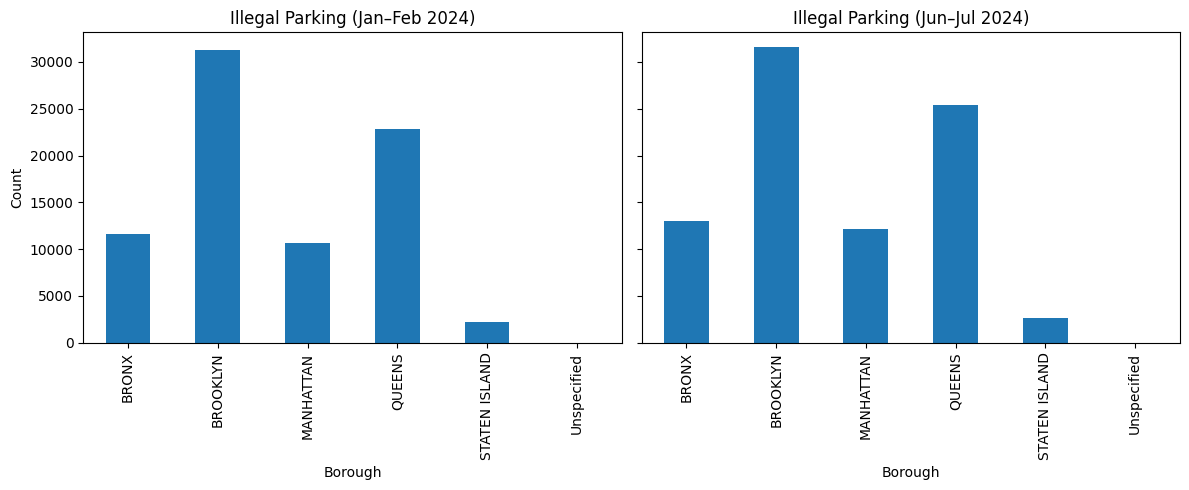

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

jan_feb_counts.plot(kind="bar", ax=axes[0], title=f"{top_type} (Jan–Feb 2024)")
axes[0].set_ylabel("Count")

jun_jul_counts.plot(kind="bar", ax=axes[1], title=f"{top_type} (Jun–Jul 2024)")

plt.tight_layout()
plt.show()